In [1]:
#importing libary
import pandas as pd

In [2]:
#getting dataset
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
#Type of dataset
type(iris)

sklearn.utils.Bunch

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
#getting independent features
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
#As the sklearn datasets are of type bunch, will convert it to dataframe
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
#View top 5 records
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
#obtaining lables
iris_df['class'] = iris.target

In [9]:
#Cecking for null values
iris_df.isnull().sum()
#no null values present in dataset

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64

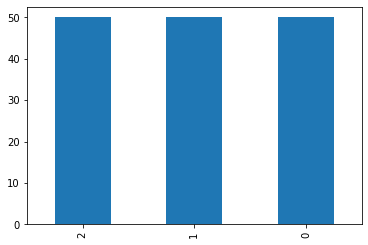

In [10]:
#Visualizing target 
iris_df['class'].value_counts().plot.bar()

dataset is balanced

In [11]:
#split our X & y

X = iris_df.drop('class', axis=1)
y = iris_df['class']

print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [12]:
from sklearn.preprocessing import StandardScaler
# Standarize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [13]:
#split our dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state =21)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [14]:
#importing Logistic regression from linear model
from sklearn.linear_model import LogisticRegression

Log_Reg= LogisticRegression(multi_class='ovr')  #Here is setting multi_class= ovr - One vs Rest or one vs All 
                                                #for multiclass problems
Log_Reg.fit(X_train,y_train)

LogisticRegression(multi_class='ovr')

In [15]:
#Prediction
Y_pred= Log_Reg.predict(X_test)

In [16]:
#evaluation metrics
from sklearn import metrics
print('Accuracy Score for test data is:')
print(metrics.accuracy_score(y_test,Y_pred))

Accuracy Score for test data is:
0.9111111111111111


In [17]:
y_train_logreg = Log_Reg.predict(X_train)
print('Accuracy Score for train data is:')
print(metrics.accuracy_score(y_train,y_train_logreg))

Accuracy Score for train data is:
0.9428571428571428


In [18]:
from sklearn.metrics import classification_report
print("Classification report for the test data:")
print("----------------------------------------")
print(classification_report(y_test,Y_pred))

Classification report for the test data:
----------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.75      0.86        16
           2       0.79      1.00      0.88        15

    accuracy                           0.91        45
   macro avg       0.93      0.92      0.91        45
weighted avg       0.93      0.91      0.91        45



In [29]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,Y_pred)

cm

array([[14,  0,  0],
       [ 0, 12,  4],
       [ 0,  0, 15]], dtype=int64)

In [19]:
# Create new observation
new_observation = [[15,7,3,1]]

In [20]:
# Predict class
Log_Reg.predict(new_observation)

array([0])

In [21]:
# View predicted probabilities
Log_Reg.predict_proba(new_observation)

array([[9.99514401e-01, 5.88161033e-06, 4.79717480e-04]])

9.99514401e-01, 5.88161033e-06, 4.79717480e-04 out of all 3, 9.99514401e-01 is highest so the new data points belongs to Iris-Setosa